# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['albany', 'turtkul', 'georgetown', 'masloc', 'kurchum', 'pevek', 'atuona', 'tasiilaq', 'vaini', 'meulaboh', 'san jeronimo', 'warqla', 'halvad', 'busselton', 'awjilah', 'yumen', 'angoram', 'hamilton', 'hasaki', 'quatre cocos', 'keti bandar', 'avarua', 'ribeira grande', 'ushuaia', 'filimonovo', 'hermanus', 'dikson', 'thompson', 'freeport', 'kuche', 'qaanaaq', 'castro', 'mataura', 'tiruchchendur', 'myrtle beach', 'port alfred', 'calbuco', 'rikitea', 'kahului', 'paamiut', 'tiksi', 'bluff', 'balkhash', 'mar del plata', 'taolanaro', 'chokurdakh', 'sao filipe', 'punta arenas', 'east london', 'granadilla de abona', 'hobart', 'wanning', 'manosque', 'zeya', 'luderitz', 'labrea', 'tabiauea', 'gao', 'wukari', 'trelew', 'illoqqortoormiut', 'deputatskiy', 'saint george', 'wakkanai', 'hambantota', 'cabo san lucas', 'saldanha', 'verkhnyaya inta', 'pont-saint-esprit', 'nikolskoye', 'grand river south east', 'codrington', 'goderich', 'coos bay', 'tsevie', 'barentsburg', 'burica', 'tura', 'khatanga', 'p

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create base url & query url
base_url = 'http://api.openweathermap.org/data/2.5/weather?'

units = 'imerial'

query_url = base_url + "units=" + units + "&appid=" + weather_api_key
print(query_url)

http://api.openweathermap.org/data/2.5/weather?units=imerial&appid=e12ce9f247c079f7a7228362970b8381


In [4]:
#generate a list to store teh city data
cloudinesses = []
cities_list = []
dates = []
humidities = []
lat = []
lon = []
temp_max = []
wind_speeds = []
countries = []

# keep track of the record and set being processed
record =0
sets = 1

print("--------------------------Beginning Data Retrieval----------------------------")
for city in cities:
   
    
    #print(response)
    try:
        print(f"Processing Record {record} of set {sets} | {city}")
        
        city_url = query_url + "&q=" + city
        response = requests.get(city_url).json()
        time.sleep(1)
        
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        cities_list.append(response['name'])
        cloudinesses.append(response['clouds']['all'])
        humidities.append(response['main']['humidity'])
        wind_speeds.append(response['wind']['speed'])
        temp_max.append(response['main']['temp_max'])
    

        print(response['name'])
        record += 1
    except:
         print(f"City not found. Skipping...")

    if record == 50:
        sets += 1
        record = 1
      
  
print('---------------------Data Retrival Complete------------------------')            

--------------------------Beginning Data Retrieval----------------------------
Processing Record 0 of set 1 | albany
Albany
Processing Record 1 of set 1 | turtkul
City not found. Skipping...
Processing Record 1 of set 1 | georgetown
George Town
Processing Record 2 of set 1 | masloc
Maşloc
Processing Record 3 of set 1 | kurchum
Kurchum
Processing Record 4 of set 1 | pevek
Pevek
Processing Record 5 of set 1 | atuona
Atuona
Processing Record 6 of set 1 | tasiilaq
Tasiilaq
Processing Record 7 of set 1 | vaini
Vaini
Processing Record 8 of set 1 | meulaboh
Meulaboh
Processing Record 9 of set 1 | san jeronimo
San Jerónimo
Processing Record 10 of set 1 | warqla
City not found. Skipping...
Processing Record 10 of set 1 | halvad
Halvad
Processing Record 11 of set 1 | busselton
Busselton
Processing Record 12 of set 1 | awjilah
Awjilah
Processing Record 13 of set 1 | yumen
Yumen
Processing Record 14 of set 1 | angoram
Angoram
Processing Record 15 of set 1 | hamilton
Hamilton
Processing Record 16 o

City not found. Skipping...
Processing Record 33 of set 3 | okhotsk
Okhotsk
Processing Record 34 of set 3 | saskylakh
Saskylakh
Processing Record 35 of set 3 | longyearbyen
Longyearbyen
Processing Record 36 of set 3 | cape town
Cape Town
Processing Record 37 of set 3 | ontario
Ontario
Processing Record 38 of set 3 | port moresby
Port Moresby
Processing Record 39 of set 3 | klaksvik
Klaksvík
Processing Record 40 of set 3 | isangel
Isangel
Processing Record 41 of set 3 | beloha
Beloha
Processing Record 42 of set 3 | butaritari
Butaritari
Processing Record 43 of set 3 | haysville
Haysville
Processing Record 44 of set 3 | temaraia
City not found. Skipping...
Processing Record 44 of set 3 | cherskiy
Cherskiy
Processing Record 45 of set 3 | bolshiye uki
City not found. Skipping...
Processing Record 45 of set 3 | prince rupert
Prince Rupert
Processing Record 46 of set 3 | sakakah
Sakakah
Processing Record 47 of set 3 | kapaa
Kapaa
Processing Record 48 of set 3 | vila franca do campo
Vila Fran

City not found. Skipping...
Processing Record 26 of set 6 | mys shmidta
City not found. Skipping...
Processing Record 26 of set 6 | vestmannaeyjar
Vestmannaeyjar
Processing Record 27 of set 6 | roma
Rome
Processing Record 28 of set 6 | hirado
Hirado
Processing Record 29 of set 6 | tromso
Tromsø
Processing Record 30 of set 6 | haines junction
Haines Junction
Processing Record 31 of set 6 | de aar
De Aar
Processing Record 32 of set 6 | faya
Faya
Processing Record 33 of set 6 | arraial do cabo
Arraial do Cabo
Processing Record 34 of set 6 | longhua
Longhua
Processing Record 35 of set 6 | nouadhibou
Nouadhibou
Processing Record 36 of set 6 | careiro da varzea
Careiro da Várzea
Processing Record 37 of set 6 | qui nhon
Qui Nhon
Processing Record 38 of set 6 | lom sak
Lom Sak
Processing Record 39 of set 6 | kattivakkam
Kattivākkam
Processing Record 40 of set 6 | astoria
Astoria
Processing Record 41 of set 6 | tilichiki
Tilichiki
Processing Record 42 of set 6 | barcelos
Barcelos
Processing Rec

Kilindoni
Processing Record 21 of set 9 | ancud
Ancud
Processing Record 22 of set 9 | tautira
Tautira
Processing Record 23 of set 9 | port elizabeth
Port Elizabeth
Processing Record 24 of set 9 | clyde river
Clyde River
Processing Record 25 of set 9 | kidal
Kidal
Processing Record 26 of set 9 | bossembele
City not found. Skipping...
Processing Record 26 of set 9 | buraydah
Buraidah
Processing Record 27 of set 9 | tuatapere
Tuatapere
Processing Record 28 of set 9 | san pedro
City of San Pedro
Processing Record 29 of set 9 | grand gaube
Grand Gaube
Processing Record 30 of set 9 | villa carlos paz
Villa Carlos Paz
Processing Record 31 of set 9 | kaitangata
Kaitangata
Processing Record 32 of set 9 | toora-khem
Toora-Khem
Processing Record 33 of set 9 | oktyabrskiy
Oktyabr'skiy
Processing Record 34 of set 9 | gamba
Gamba
Processing Record 35 of set 9 | voskresenskoye
Voskresenskoye
Processing Record 36 of set 9 | nelson bay
Nelson Bay
Processing Record 37 of set 9 | isla vista
Isla Vista
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
print(len(dates))


555


In [6]:
#create pandas df
weather_df = pd.DataFrame({"Countries": countries,
                           "City": cities_list,
                           "Lat": lat,
                           "Lon":lon,
                           "Date": dates,
                           "Max Temp (F)": temp_max,
                           "Humidities %": humidities,
                           "Cloudinesses": cloudinesses,
                           "Wind Speed": wind_speeds})
#display the df
weather_df.head()

,Countries,City,Lat,Lon,Date,Max Temp (F),Humidities %,Cloudinesses,Wind Speed
0,US,Albany,42.6001,-73.9662,1613850984,272.59,45,84,2.24
1,MY,George Town,5.4112,100.3354,1613850868,299.15,69,20,3.09
2,RO,Maşloc,45.9981,21.4497,1613851019,275.93,100,10,1.54
3,KZ,Kurchum,48.5722,83.6542,1613851020,254.93,92,2,0.69
4,RU,Pevek,69.7008,170.3133,1613851022,242.81,88,100,2.48


In [7]:
weather_df.tail(25)

#save data to csv
weather_df.to_csv(output_data_file, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Get the indices of cities that have humidity over 100%.
new_weather_df = weather_df[weather_df["Humidities %"] < 100 ]
weather_df = new_weather_df.dropna(how='all')
weather_df


,Countries,City,Lat,Lon,Date,Max Temp (F),Humidities %,Cloudinesses,Wind Speed
0,US,Albany,42.6001,-73.9662,1613850984,272.59,45,84,2.24
1,MY,George Town,5.4112,100.3354,1613850868,299.15,69,20,3.09
3,KZ,Kurchum,48.5722,83.6542,1613851020,254.93,92,2,0.69
4,RU,Pevek,69.7008,170.3133,1613851022,242.81,88,100,2.48
5,PF,Atuona,-9.8000,-139.0333,1613851023,299.47,78,100,6.24
...,...,...,...,...,...,...,...,...,...
550,MZ,Chokwé,-24.5333,32.9833,1613851848,299.11,88,100,1.90
551,JM,Black River,18.0264,-77.8487,1613851849,301.15,69,20,5.66
552,BR,Ortigueira,-24.2083,-50.9494,1613851851,299.50,64,89,0.81
553,BS,Andros Town,24.7000,-77.7667,1613851852,297.15,78,75,5.14


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

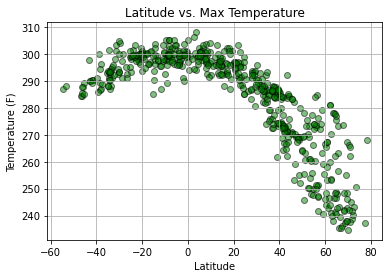

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp (F)"],
            marker="o",
            facecolors="green",
            edgecolors="black",
            alpha = 0.5 )

# Incorporate the other graph properties
plt.title(f'Latitude vs. Max Temperature')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat_Vs_Max_Temp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

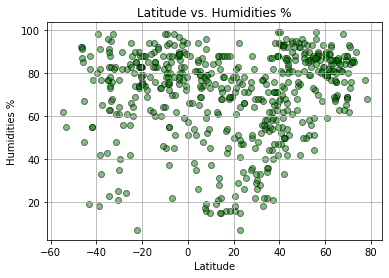

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidities %"],
            marker="o",
            facecolors="green",
            edgecolors="black",
            alpha = 0.5 )

# Incorporate the other graph properties
plt.title(f'Latitude vs. Humidities %')
plt.ylabel("Humidities %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat_Vs_Humidities.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

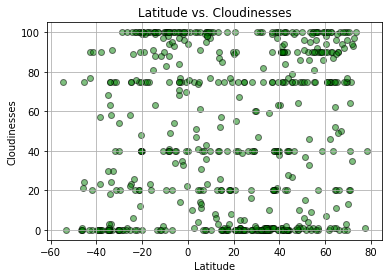

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudinesses"],
            marker="o",
            facecolors="green",
            edgecolors="black",
            alpha = 0.5 )

# Incorporate the other graph properties
plt.title(f'Latitude vs. Cloudinesses')
plt.ylabel("Cloudinesses")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat_Vs_Cloudinesses.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

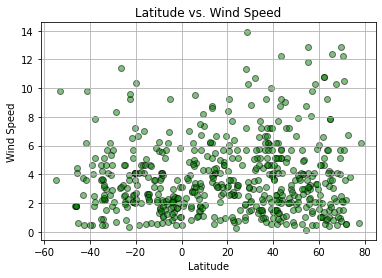

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"],
            marker="o",
            facecolors="green",
            edgecolors="black",
            alpha = 0.5 )

# Incorporate the other graph properties
plt.title(f'Latitude vs. Wind Speed')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat_Vs_Wind Speed.png")

# Show plot
plt.show()

## Linear Regression

In [16]:
#create df for the two different hemisphere
northern_hemi = weather_df.loc[weather_df["Lat"] >= 0.0]
northern_hemi

southern_hemi = weather_df.loc[weather_df["Lat"] < 0.0]
southern_hemi

,Countries,City,Lat,Lon,Date,Max Temp (F),Humidities %,Cloudinesses,Wind Speed
5,PF,Atuona,-9.8000,-139.0333,1613851023,299.47,78,100,6.24
7,TO,Vaini,-21.2000,-175.2000,1613851025,297.15,73,75,5.66
9,PE,San Jerónimo,-11.9472,-75.2829,1613851028,286.93,60,88,3.14
11,AU,Busselton,-33.6500,115.3333,1613851031,288.15,95,3,0.45
14,PG,Angoram,-4.0625,144.0661,1613851035,296.20,97,100,0.84
...,...,...,...,...,...,...,...,...,...
544,NC,Vao,-22.6667,167.4833,1613851841,299.49,85,100,9.59
546,TO,Pangai,-19.8000,-174.3500,1613851843,299.01,75,100,10.37
547,PG,Kieta,-6.2167,155.6333,1613851844,299.82,78,54,1.27
550,MZ,Chokwé,-24.5333,32.9833,1613851848,299.11,88,100,1.90


In [17]:
# Generate x and y values 
x_values = weather_df["Lat"]
y_values = weather_df["Max Temp (F)"]

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

0      273.754457
1      289.365099
3      271.247571
4      262.378500
5      295.750246
          ...    
550    301.934787
551    284.069665
552    301.798363
553    281.268313
554    289.376810
Name: Lat, Length: 548, dtype: float64
y = -0.42x + 291.64


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7770638376608408


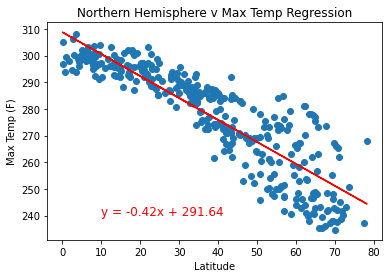

In [57]:
# the x and y values
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Max Temp (F)"]

# scatter plot
plt.scatter(x_values,y_values)

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

# regression values
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title("Northern Hemisphere v Max Temp Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# annoations,color,fontsize
plt.annotate(line_eq,(10,240), fontsize=12, color="red",)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("output_data/nh_Vs_max_temp.png")

# Show plot
plt.show()

The graph above is showing a negative correlation 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3671397610870832


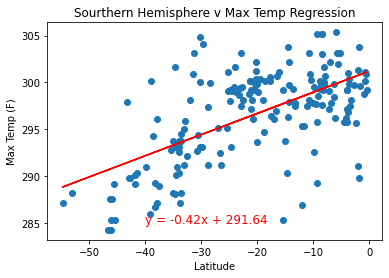

In [25]:
# the x and y values
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Max Temp (F)"]

# scatter plot
plt.scatter(x_values,y_values)

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title("Sourthern Hemisphere v Max Temp Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# annoations,color,fontsize
plt.annotate(line_eq,(-40,285), fontsize=12, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("output_data/sh_Vs_maxtemp.png")

# Show plot
plt.show()

The graph above is showing a positive correlation 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1469919743603457


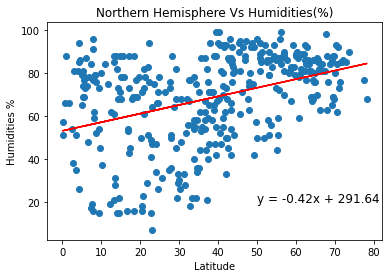

In [34]:
# the x and y values
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Humidities %"]

# scatter plot
plt.scatter(x_values,y_values)

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title("Northern Hemisphere Vs Humidities(%)")
plt.xlabel("Latitude")
plt.ylabel("Humidities %")

# annoations,color,fontsize
plt.annotate(line_eq,(50,20), fontsize=12, color="black")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("output_data/nh_Vs_Humidities.png")

# Show plot
plt.show()

The graph above is showing no correlation btw northern hemisphere and humidities. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04351431919445643


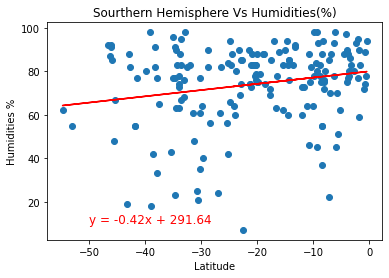

In [33]:
# the x and y values
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Humidities %"]

# scatter plot
plt.scatter(x_values,y_values)

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title("Sourthern Hemisphere Vs Humidities(%)")
plt.xlabel("Latitude")
plt.ylabel("Humidities %")

# annoations,color,fontsize
plt.annotate(line_eq,(-50,10), fontsize=12, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("output_data/sh_Vs_Humidities.png")

# Show plot
plt.show()

The graph above is showing no correlation btw sourthern hemisphere and humidities. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03557926081127656


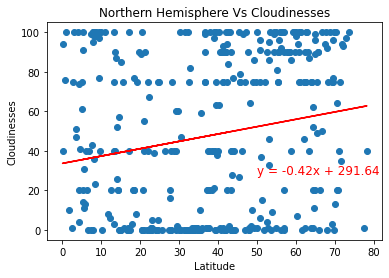

In [39]:
# the x and y values
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Cloudinesses"]

# scatter plot
plt.scatter(x_values,y_values)

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title("Northern Hemisphere Vs Cloudinesses")
plt.xlabel("Latitude")
plt.ylabel("Cloudinesses")

# annoations,color,fontsize
plt.annotate(line_eq,(50,28), fontsize=12, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("output_data/nh_Vs_Cloudinesses.png")

# Show plot
plt.show()

The graph above is showing no correlation 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.21039435796665676


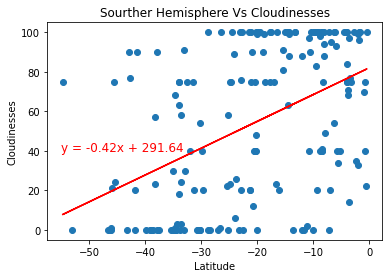

In [44]:
# the x and y values
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Cloudinesses"]

# scatter plot
plt.scatter(x_values,y_values)

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title("Sourther Hemisphere Vs Cloudinesses")
plt.xlabel("Latitude")
plt.ylabel("Cloudinesses")

# annoations,color,fontsize
plt.annotate(line_eq,(-55,40), fontsize=12, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("output_data/SH_Vs_Cloudinesses.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.00012311244854906086


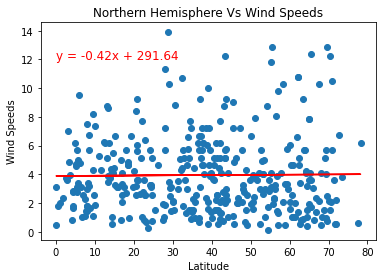

In [49]:
# the x and y values
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Wind Speed"]

# scatter plot
plt.scatter(x_values,y_values)

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title("Northern Hemisphere Vs Wind Speeds")
plt.xlabel("Latitude")
plt.ylabel("Wind Speeds")

# annoations,color,fontsize
plt.annotate(line_eq,(0,12), fontsize=12, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("output_data/NH_Vs_Wind Speed.png")

# Show plot
plt.show()

The graph above is showing no correlation btw northern hemisphere and humidities. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017687856292453744


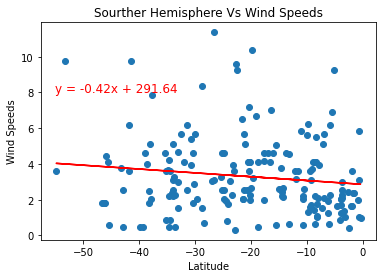

In [55]:
# the x and y values
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Wind Speed"]

# scatter plot
plt.scatter(x_values,y_values)

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title("Sourther Hemisphere Vs Wind Speeds")
plt.xlabel("Latitude")
plt.ylabel("Wind Speeds")

# annoations,color,fontsize
plt.annotate(line_eq,(-55,8), fontsize=12, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("output_data/SH_Vs_Wind Speed.png")

# Show plot
plt.show()

The graph above is showing no correlation 